# Gradientmetoden - numeriske beregninger med gradienten 

## Del 1: Introduksjon til gradient descent.

Du skal ikke levere noe på del 1, men jobb igjennom teksten og eksemplene, slik at du bedre forstår hvordan algoritmen fungerer og de begrensningene den har. 

Vi går ikke i dybden på noe av dette, men det kan være greit å være litt informert før dere bruker dette i en annen situasjon.

Vi lager fullstendige pythonprogram i hver kodesnutt - det må du også gjøre! Du kan kopiere koden og jobbe i Spyder (anbefalt) for hver del. Vi kommenterer kun det som er nytt i hvert eksempel. Hvis du ikke husker hva en linje gjør i programmet, så kan du se på eksemplene lenger opp i dokumentet. 

I del 1 så anbefaler vi at du eksperimenterer med ulike verdier (se kommentarene) for å bli litt kjent med hva som kan skje. Prøv å forstå algoritmen så godt du klarer. 

Vi henviser også til forelesningen som er publisert som video på blackboard.

Du trenger ikke levere noe på del 1.

### Gradientmetoden for en variabel

Gradientmetoden er en algoritme som finner minimumspunkt til en funksjon i en eller flere variable. Dvs. et punkt $x$ slik at $f(a)\geq f(x)$ for alle $a$ i et (lite) område rundt $x$. Du kjenner dette problemet både fra R2/matte 1 og fra matte 2. 

Tidligere så fant dere minimumspunkter ved å regne ut $f'(x)$, deretter løse $f'(x)=0$ symbolsk og til slutt undersøke nærmere (f.eks. med andrederivertstesten) for å se om punktet er et minimumspunkt. Problemet med det du har lært er at løse likningen $f'(x)=0$ er svært vanskelig bortsett fra i noen enkle eksempler. Det er selvfølgelig mulig å løse likningen numerisk, men det er ikke hva vi skal gjøre her.

Ideen til gradientmetoden er veldig enkel. Vi starter med et punkt $x_0$, som vi tror kan være et rimelig svar. Deretter finner vi gradienten i dette punktet $\nabla f (x_0)$. Retningen til gradienten $\nabla f(x_0)$ er retningen hvor funksjonsverdien har størst stigningstall. I motsatt retning har vi minst stigningstall, dvs. det er "brattest nedover". 

Vi tar et lite skritt i motsatt retning av gradienten $x_1 = x_0 - \lambda \cdot \nabla f (x_0)$ hvor $\lambda$ er et passende, ofte lite, tall. Vi har (forhåpentligvis) mindre funksjonsverdi i $x_1$. Vi regner deretter ut gradienten i $x_1$ og tar et lite skritt til, $x_2 = x_1 - \lambda \cdot \nabla f(x_1)$, for å få en enda mindre funksjonsverdi, og slik fortsetter vi til vi har fått en god nok tilnærming til et minimumspunkt. 

Hva som er en god nok tilnærming er avhengig av konteksten vi jobber i. I akkurat dette eksemplet betyr det at vi stopper når den deriverte er mindre enn 0.001

Merk at gradienten for en envariabelfunksjon er den vanlige deriverte.


In [119]:
# Vi finner minpunkt til f(x)=x^2-4. Gradienten er lik den deriverte f'(x)=2x i dette eksemplet.
# Riktig svar er x = 0 med funksjonsverdi -4

# Utregning av funksjonsverdi i punktet p 
def f(x):
    return x*x-4

# Utregning av den deriverte f'(x)
def gradient(x):
    return 2*x

stegLengde = 0.001     # lambda i teksten over
x = 4.0                # startverdi for x
toleranse = 0.001      # Vi er fornøyd når feilen er mindre enn toleransen
feil = gradient(x)     # Den deriverte skal være 0, slik at df/dx er feilen vi har nå

while abs(feil) > toleranse:        # Vi gjentar til vi er fornøyd
    nyGradient = gradient(x)        # Vi regner ut gradienten i punktet vi er i nå
    x = x - stegLengde * nyGradient # Vi beveger oss et skritt i motsatt retning av gradienten
    feil = nyGradient               # Brukes til å måle hvor langt vi er unnå at den deriverte er 0
    # print(x)                      # Ta bort kommentartegnet hvis du vil se hvordan x endrer seg underveis
    
print("Minimumspunkt er x =",x, "med funksjonsverdi f(x) =", f(x))  

Minimumspunkt er x = 0.0004981050134077757 med funksjonsverdi f(x) = -3.9999997518913957


Det er ikke så enkelt å velge steglengden $\lambda$. Hvis $\lambda$ er for liten, så kan det gå lang tid å bli ferdig. Hvis $\lambda$ er for stor så er det ikke sikkert metoden konvergerer. Vi kommer ikke til å gå i dybden på denne problemstillingen i denne øvingen, men vi skal se på et eksempel.

Når algoritmen kjører med steglengde $2$ på funksjonen $x^2$ så konvergerer ikke algoritmen. Verdiene som produseres blir større og større. 

Med positiv steglengde så finnes det tre tilfeller for hva gradient descent vil gjøre på $x^2$. Når steglengden er i intervallet $(0,a)$ så vil gradient descent konvergere, når steglengden er $a$ så vil gradient descent alternere mellom startpunktet og et annet punkt og når steglengden er i intervallet $(a,\infty)$ så vil gradient descent gi stigende verdier.

Det er mulig å regne seg frem til tallet $a$.

Dette kan du enten gjøre ved utregning for hånd, eller du kan prøve deg fram.

Når gradient descent ikke konvergerer, så skyldes det at steglengden ganger gradienten vil bli så stor at programmet hopper forbi minimumspunktet.

Siden algoritmen ikke alltid konvergerer, så legger vi inn en test i programmet som avslutter hvis vi har regnet for lenge.

For funksjoner som er mer kompliserte enn $x^2$, så vil valg av steglengde være en viktig problemstilling. 

Du kan prøve å endre på maxAntallSteg og steglengde og se hva som skjer. Hvis du får tallet "nan", som betyr "not a number" så har du fått et tall som er så stort at det ikke kan lagres. 

In [120]:
# Vi mislykkes i å finne minimumspunkt for funksjonen f(x)=x^2

def f(x):
    return x**2

def gradient(x):
    return 2*x

stegLengde = 2.0       # Eksperimenter med ulike steglengder. Steglengden 2.0 er nok alt for stor.
x = 1                
toleranse = 0.0001   
feil = gradient(x)   
maxAntallSteg = 10     # Maks antall steg som algoritmen vil utføre, prøv med ulike verdier
antallSteg = 1         # Antall steg vi har utført så langt

while abs(feil) > toleranse and maxAntallSteg > antallSteg:
    nyGradient = gradient(x)
    feil = nyGradient
    x = x - stegLengde * nyGradient
    antallSteg = antallSteg + 1
    # print(antallSteg, feil, x, f(x)) # ta bort # hvis du vil se feilene og hvor du er underveis i beregningen

if maxAntallSteg <= antallSteg:
    print("Algoritmen ble avsluttet fordi den kjørte for lenge")
          
print("Min punkt er x = ",x, "med funksjonsverdi f(x) = ", f(x))

Algoritmen ble avsluttet fordi den kjørte for lenge
Min punkt er x =  -19683.0 med funksjonsverdi f(x) =  387420489.0


Her gir vi et eksempel på en funksjon hvor algoritmen ikke konvergerer, selv om vi er forsiktig med valg av skrittlengden.

Vi definerer $f(x)=-|x|\log(|x|)+x^2$ når $x≠0$ og vi definererer at $f(0)=0$. Denne funksjonen er kontinuerlig overalt og deriverbar overalt bortsett fra i punktet $x=0$.

Denne funksjonen har nøyaktig ett minimumspunkt. Det er i punktet $x=0$. Alikevel vil gradient descent fungere ganske dårlig for denne funksjonen. 

Poenget her er at den deriverte av denne funksjonen går mot uendelig når $x$ går mot null, altså vil gradient descent aldri konvergere for noen valg av steglengde. Det er også mulig at algoritmen blir verdier utenfor definisjonsområdet for log

Du kan prøve selv med med toleranse $0.001$, startpunkt $x=1$ og ulike steglengder, hvor du skriver ut verdiene underveis i gradient descent. 

PS. Den dervierte av $f$ er $ 2\cdot x-(\text{sign}(x)\cdot \log(|x|)+\text{sign}(x))$. 


In [121]:
# Vi konvergerer ikke alltid til løsning

import numpy as np

def f(x):
    return -abs(x) * np.log(abs(x)) + x**2

def gradient(x):
    return 2*x - (np.sign(x) * np.log(abs(x) / 10.0) + np.sign(x))

stegLengde = 0.0001  
x = 1.0                      # Du kan prøve å endre på startverdien til noe høyere. 
toleranse = 0.001    
feil = gradient(x)   
maxAntallSteg = 1000         # Du kan prøve å endre til noe større
antallSteg = 1

while abs(feil) > toleranse and antallSteg < maxAntallSteg:
    nyGradient = gradient(x)
    feil = nyGradient
    x = x - stegLengde * nyGradient
    antallSteg = antallSteg + 1
    # print(feil, x, f(x))
    
if maxAntallSteg <= antallSteg:
    print("Algoritmen avsluttet da den brukte for lang tid")
else:
    print("Algoritmen avsluttet etter ", antallSteg, "steg")

print("Min punkt er x =", x, "med funksjonsverdi f(x) =", f(x))  

Algoritmen avsluttet da den brukte for lang tid
Min punkt er x = 0.6840237685751992 med funksjonsverdi f(x) = 0.7276551693997528


### Flere minimumspunkter

Hvis vi bruker gradient descent på funksjonen $f(x)=x^4 -12x^3-32x^2+240x$ med startverdi $x=-4$ så får vi et annet svar enn om vi bruker $x=4$. 

Her anbefaler vi at du tegner grafen til funksjonen (gjerne med geogebra eller med Python) for å forstå hva som foregår.

Vi anbefaler også at du implementerer gradientmetoden for dette problemet. Det vil gjøre det lettere å løse oppgavene du skal levere senere.


### Gradientmetoden med numerisk beregning av gradient

Det er ikke nødvendigvis så enkelt å finne en formel for de partiellderiverte, og det er ikke sikkert vi har en formel for funksjonen $f$ heller. Vi må i såfall regne numerisk, dvs. vi bruker 
$$
f'(x)\approx \frac{f(x+\Delta x)-f(x-\Delta x)}{2\cdot \Delta x}
$$

Vi endrer eksemplet over slik at vi regner ut den deriverte numerisk. Nå får vi en ny parameter delta som vi også må justere. 

Det er to grunner til at vi velger å bruke numerisk beregning av gradienten. For det første, det kan være svært vanskelig eller umulig å regne ut en formel for de deriverte. For det andre, vi trenger ikke lenger regne ut den deriverte for hånd (eller med sympy) og programmere denne. Vi har nå en beregning av gradienten som fungerer for alle funksjoner $f$.

I eksemplet regner vi også ut den deriverte for en funksjon $g$. Vi bruker samme funksjon for å regne ut gradienten som vi gjør for $f$.



In [122]:
import numpy as np

# Vi finner minpunkt til f(x)=x^2-2x+4. 
# Vi bruker ikke formel for den deriverte i dette eksemplet
# Riktig svar er x = 1 med funksjonsverdi 3

def f(x):
    return x*x-2*x+4

def g(x):
    return np.sin(x)

# numerisk beregning av den deriverte
# f er funksjonen vi skal derivere
# x er punktet vi skal derivere i
# deltax er 0.5 av lengden til intervallet vi bruker i tilnærmingen
def gradient(f, x, deltax):
    return (f(x + deltax) - f(x - deltax)) / (2.0*deltax)
 
print("Tilnærmingen til den deriverte til funksjonen g(x) = sin(x) for x = 10 med deltax = 0.001 er ", gradient(g, 10, 0.001))

deltax = 0.0000001   # delta i beregning av tilnærming til den deriverte
x = 4.0              
stegLengde = 0.01    
toleranse = 0.01     
feil = gradient(f, x, deltax)
maxAntallSteg = 1000 
antallSteg = 1      

while abs(feil) > toleranse and maxAntallSteg > antallSteg:
    nyGradient = gradient(f,x,deltax)
    x = x - stegLengde * nyGradient
    feil = nyGradient
    antallSteg = antallSteg + 1
    # print(antallSteg, feil, x)
    
if maxAntallSteg <= antallSteg:
    print("Algoritmen avsluttet da den brukte for lang tid")
else:
    print("Algoritmen avsluttet etter ", antallSteg, "steg")
    
print("Minimumpunkt for x = ",x, "med funksjonsverdi f(x) = ", f(x))



Tilnærmingen til den deriverte til funksjonen g(x) = sin(x) for x = 10 med deltax = 0.001 er  -0.8390713892307278
Algoritmen avsluttet etter  319 steg
Minimumpunkt for x =  1.0048642213615864 med funksjonsverdi f(x) =  3.000023660649455



Når du lærte om derivasjon første gang så ble du kanskje fortalt at $\Delta x$ skal være så liten som mulig for å få en god tilnærming. Det stemmer ikke helt, da datamaskiner kan ikke lagre veldig små eller veldig store tall. 

Vi ser på et eksempel

Vi regn ut den deriverte av funksjonen $f(x)=\cos(x^2)$ i $x=10$ ved å gjøre symbolske utregninger og deretter sette inn for $x=10$ i det
symbolske uttrykket. Svaret blir skrevet ut.

Vi lager et program skriver ut tilnærminger til den deriverte av funksjonen $f(x)=\cos(x^2)$ i $x=10.0$, for $\Delta x=10^{-n}$ for alle heltall $n$ mellom $0$ og $20$ ved å bruke funksjonen gradient definert i eksemplet over. 

Vi kan da se hvilken verdi for $\Delta x$ som gir best tilnærming. For akkurat denne situasjonen så er $n=6$, dvs. $\Delta x=10^{-6}$, et bra valg.

Merk at i en annen situasjon, f.eks. med en annen funksjon, så kan svaret være noe helt annet.


In [123]:
import numpy as np  

# beregning av funksjonsverdien f(x)
def f(x):
    return np.cos(x**2)

# den deriverte til f(x) beregnet symbolsk og deretter implementert
def df(x):
    return -2.0*x*np.sin(x**2)

# numerisk beregning av den deriverte
def gradient(f, x, delta):
    return (f(x + delta) - f(x - delta)) / (2.0*delta)

x = 10.0

print("Symbolsk utregnet verdi er ", df(x));

delta = 10    
for i in range (0,20):
    delta /= 10.0
    deriverte = gradient(f, x, delta)
    print(i, delta, deriverte)


Symbolsk utregnet verdi er  10.127312822195176
0 1.0 -0.41267479561089254
1 0.1 4.525730402038244
2 0.01 10.058219092258941
3 0.001 10.12662043627155
4 0.0001 10.127305898167682
5 1e-05 10.127312752572504
6 1.0000000000000002e-06 10.127312813912324
7 1.0000000000000002e-07 10.127312760621619
8 1.0000000000000002e-08 10.127313659902269
9 1.0000000000000003e-09 10.127313654351152
10 1.0000000000000003e-10 10.127277350058247
11 1.0000000000000003e-11 10.126410820987529
12 1.0000000000000002e-12 10.131839811577946
13 1.0000000000000002e-13 10.074163725448669
14 1.0000000000000002e-14 10.796918914479646
15 1e-15 21.593837828959295
16 1.0000000000000001e-16 0.0
17 1e-17 0.0
18 1e-18 0.0
19 1.0000000000000001e-19 0.0


## Del 2: Gradientmetoden med flere variable

Vi er mest interessert i problemer med flere (kanskje svært mange) variabler. Så vi utvider koden slik at vi kan behandle dette. Her så er ikke $x$ et tall lenger, istedet en vektor som vi kaller $p$. Vi ser på vektorer i to dimensjoner i eksemplet.

Vi bruker numpy når vi jobber med vektorer og matriser numerisk.

Gradienten er en vektor satt sammen av de partiellderiverte. For eksempel,

$\frac{\partial f}{\partial x} \approx \frac{f(p+\begin{pmatrix}\Delta \\ 0\end{pmatrix}) - f(p-\begin{pmatrix}\Delta \\ 0\end{pmatrix})}{2\cdot \Delta}$

og 

$\frac{\partial f}{\partial y} \approx \frac{f(p+\begin{pmatrix}0 \\ \Delta \end{pmatrix}) - f(p-\begin{pmatrix}0 \\ \Delta\end{pmatrix})}{2\cdot \Delta}$.

for et lite tall $\Delta$.

Vi lager en liten hjelpefunksjon "abs" som regner ut lengden til en vektor, slik at koden ser så lik ut som mulig med koden over. Denne funksjonen
er bare der for at koden blir litt enklere å lese.


In [124]:
# Vi finner et minimumspunkt til f(x,y) = x**2 + 2x + y**2 - 2*y + 4. Riktig svar er (-1,1) med funksjonsverdi 2. 
# Vi starter i [8,4], velger delta = 0.00001 og stegLengde = 0.01.

import numpy as np
     
# p[0] er x-koordinat og p[1] er y-koordinat til punktet
def f(p):
    return p[0]**2 + 2*p[0] + p[1]**2 - 2*p[1] + 4

# Utregning av partiellderiverte numerisk
# i er hvilken retning vi skal derivere
# p er punktet vi skal derivere i
# f er funksjonen vi skal derivere
# delta er et "lite" tall vi bruker i tilnærmingen til den deriverte
def diff(f, p, i, delta):
    q1 = np.copy(p) 
    q1[i] = q1[i] - delta
    q2 = np.copy(p) 
    q2[i] = q2[i] + delta
    return (f(q2) - f(q1))  / (2*delta)

# regner ut gradienten i et punkt ved å samle alle de deriverte i en vektor
def gradient(f, p, delta):
    return np.array([diff(f,p,i,delta) for i in range(len(p))])
    
# regner ut lengden til en vektor - strengt tatt ikke nødvendig, vi kunne ha brukt np.linalg.norm direkte
abs = np.linalg.norm

delta = 0.00001           # delta i beregning av tilnærming til den deriverte
p = np.array([8.0,4.0])   # startposisjon p[0] er x-koordinat, p[1] er y-koordinat
stegLengde = 0.01         
toleranse = 0.01          
maxAntallSteg = 1000 
antallSteg = 1
feil = gradient(f, p, delta)

while abs(feil) > toleranse and maxAntallSteg > antallSteg:
    nyGradient = gradient(f,p,delta)
    p = p - stegLengde * nyGradient
    feil = nyGradient
    antallSteg = antallSteg + 1
    feil = nyGradient
    # print(antallSteg, feil, p)
    
if maxAntallSteg <= antallSteg:
    print("Algoritmen avsluttet da den brukte for lang tid")
else:
    print("Algoritmen avsluttet etter ", antallSteg, "steg")
    
print("Minimumspunkt for p =",p, "med funksjonsverdi f(p) =", f(p), " og feil ", abs(feil))


Algoritmen avsluttet etter  376 steg
Minimumspunkt for p = [-0.9953866  1.0015378] med funksjonsverdi f(p) = 2.0000236482647518  og feil  0.009924384004406076


### Oppgave 1

Bruk gradient descent på funksjonen $$f(x,y,z,w)=x^2+2y^2+3z^2+w^2+2xy+3xz+xw+4yz+2yw+2wz-3x-8y-5z-7w$$ for å finne et minimumspunkt. Bruk valgfritt startpunkt, skrittlengde $0.01$, toleranse $0.01$ og $\delta=0.00001$. Gjør dette ved å kopiere koden i eksemplet over og å endre på koden hvor det trengs. Juster maksimalt antall steg hvis det er nødvendig, men ikke lever noe med mer enn 50000 steg.

Det er viktig at algoritmen få kjørt ferdig. Hvis algoritmen avslutter med feil større enn toleransen, så må du tenke litt og justere noe for å komme frem til et godt svar.


In [125]:
#
# Svaret på oppgaven skal legges inn her
#
import numpy as np



def f(p):
    x, y, z, w = p
    return (x**2 + 2*y**2 + 3*z**2 + w**2 + 2*x*y + 3*x*z + x*w + 4*y*z + 2*y*w + 2*w*z -3*x -8*y - 5*z - 7*w)

def diff(f, p, i, delta):
    q1 = np.copy(p) 
    q1[i] = q1[i] - delta
    q2 = np.copy(p) 
    q2[i] = q2[i] + delta
    return (f(q2) - f(q1))  / (2*delta)

def gradient(f, p, delta):
    return np.array([diff(f,p,i,delta) for i in range(len(p))])

abs = np.linalg.norm

p0 = np.array([8.0,4.0,2.0,1.0])
p1 = np.array([0.0, 0.0, 0.0, 0.0])
p2 = np.array([1.0, 1.0, 1.0, 1.0])
p3 = np.array([-2.0, 2.0, -2.0, 2.0])
p4 = np.array([3.0, -3.0, 3.0, -3.0])
ps = [p0, p1, p2, p3, p4]

delta = 0.00001
stegLengde = 0.01
toleranse = 0.01
maxAntallSteg = 5000

for p in ps:
    print("")
    print("Startpunkt: ", p)
    feil = gradient(f, p, delta)
    antallSteg = 1

    while abs(feil) > toleranse and maxAntallSteg > antallSteg:
        nyGradient = gradient(f,p,delta)
        p = p - stegLengde * nyGradient
        feil = nyGradient
        antallSteg = antallSteg + 1
        feil = nyGradient
        # print(antallSteg, feil, p)

    if maxAntallSteg <= antallSteg:
        print("Algoritmen avsluttet da den brukte for lang tid")
    else:
        print("Algoritmen avsluttet etter ", antallSteg, "steg")

    print("Minimumspunkt for p =",p, "med funksjonsverdi f(p) =", f(p), " og feil ", abs(feil))


Startpunkt:  [8. 4. 2. 1.]
Algoritmen avsluttet etter  1337 steg
Minimumspunkt for p = [ 1.02163775  2.00478103 -2.01442473  2.99854969] med funksjonsverdi f(p) = -14.999868493057562  og feil  0.009969691739731295

Startpunkt:  [0. 0. 0. 0.]
Algoritmen avsluttet etter  1165 steg
Minimumspunkt for p = [ 0.97824647  1.99544135 -1.98560015  3.00124364] med funksjonsverdi f(p) = -14.999868168141129  og feil  0.009982734235872223

Startpunkt:  [1. 1. 1. 1.]
Algoritmen avsluttet etter  1109 steg
Minimumspunkt for p = [ 0.97827697  1.99534267 -1.98557696  3.00133244] med funksjonsverdi f(p) = -14.999868086256962  og feil  0.009985291758811054

Startpunkt:  [-2.  2. -2.  2.]
Algoritmen avsluttet etter  1200 steg
Minimumspunkt for p = [ 0.97816319  1.99568026 -1.98565075  3.00102718] med funksjonsverdi f(p) = -14.999868208512096  og feil  0.009983959432893208

Startpunkt:  [ 3. -3.  3. -3.]
Algoritmen avsluttet etter  1103 steg
Minimumspunkt for p = [ 0.97857704  1.9947733  -1.98551469  3.0018

# Del 3: Gradient descent og likningssystemer 

Vi skal se på hvordan vi kan bruker gradient descent for å løse et likningssystem

Systemet vi skal løse er

$$\cos(\theta_1) + \cos(\theta_1 + \theta_2) = 1.5$$
$$\sin(\theta_1) + \sin(\theta_1 + \theta_2) = 0.3$$

Vi lager en vektor $f$

$$
f(p) = \begin{pmatrix}f_1(p) \\ f_2(p) \end{pmatrix} = \begin{pmatrix}\cos(\theta_1) + \cos(\theta_1 + \theta_2) - 1.5 \\ \sin(\theta_1) + \sin(\theta_1 + \theta_2) - 0.3\end{pmatrix}
$$

Vi er ute etter $\theta_1$ og $\theta_2$ slik at $f$ er så nær null-vektor som mulig. Dvs. vi minimerer (kvadratet) til lengden til vektoren $f$, som regnes ut ved å ta skalarproduktet av vektoren med seg selv. Hvis $f$ er lik null, så har vi løst likningssystemet.

### Vi gir dere ikke hele koden denne gangen. Dere må fylle ut litt selv. Se kommentarene i koden under.



In [126]:

import numpy as np

def diff(f, p, i, delta):
    q1 = np.copy(p) 
    q1[i] -= delta
    q2 = np.copy(p) 
    q2[i] += delta
    return (f(q2) - f(q1))  / (2 * delta)


# **************************
# Dere må implementere dette
#

# p[0] er theta1
# p[1] er theta2
# vi returnerer kvadratet av lengden av f(p)
def f(p):
    return np.array([0.0,0.0])  # Ta bort denne linjen når du starter
#
#
# ****************************


def gradient(f, p, delta):
    grad = [diff(f,p,i,delta) for i in range(len(p))]
    return np.array(grad)
    
abs = np.linalg.norm



# ***************************
# Dere må prøve dere frem og gjøre noen gode valg for tallene her
#
delta = 1.0  
p = np.array([0.0,0.0])   
stegLengde = 1.0            
toleranse = 1.0
antallSteg = 1
maxAntallSteg = 10
#
#
# ****************************


feil = gradient(f, p, delta)

while abs(feil) > toleranse and maxAntallSteg > antallSteg:
    nyGradient = gradient(f,p,delta)
    p = p - stegLengde * nyGradient
    feil = nyGradient
    antallSteg = antallSteg + 1

if maxAntallSteg <= antallSteg:
    print("Algoritmen avsluttet da den brukte for lang tid")
else:
    print("Algoritmen avsluttet etter ", antallSteg, "steg")
    
print("Med vinklene p = ", p, " så har avstand til løsning lik ", np.sqrt(f(p)))


Algoritmen avsluttet etter  1 steg
Med vinklene p =  [0. 0.]  så har avstand til løsning lik  [0. 0.]


In [127]:
#
# Svaret skal legges inn her
#
import numpy as np


def diff(f, p, i, delta):
    q1 = np.copy(p)
    q1[i] -= delta
    q2 = np.copy(p)
    q2[i] += delta
    return (f(q2) - f(q1)) / (2 * delta)


def f(p):
    t1, t2 = p
    f1 = np.cos(t1) + np.cos(t1 + t2) - 1.5
    f2 = np.sin(t1) + np.sin(t1 + t2) - 0.3
    return np.array([f1, f2])


def cost_function(p):
    feil_vektor = f(p)
    return np.dot(feil_vektor, feil_vektor)

def gradient(f, p, delta):
    grad = [diff(lambda x: cost_function(x), p, i, delta) for i in range(len(p))]
    return np.array(grad)


delta = 0.00001          
p = np.array([0.5, 0.5]) 
stegLengde = 0.1         
toleranse = 0.0001       
maxAntallSteg = 10000    
antallSteg = 1


while True:
    grad = gradient(f, p, delta)
    p = p - stegLengde * grad
    avstand = np.linalg.norm(f(p)) 

    antallSteg += 1
    if avstand < toleranse or antallSteg >= maxAntallSteg:
        break


if antallSteg >= maxAntallSteg:
    print("Algoritmen avsluttet uten å konvergere innen maks antall steg")
else:
    print("Algoritmen konvergerte etter", antallSteg, "steg")

print("Med vinklene p =", p, " så har avstand til løsning lik", avstand)


Algoritmen konvergerte etter 168 steg
Med vinklene p = [-0.50250131  1.39981752]  så har avstand til løsning lik 9.77786511121127e-05


## Oppgave 2

Denne gangen skal du løse likningen

$$\cos(\theta_1) + \cos(\theta_1 + \theta_2) = 4.0$$
$$\sin(\theta_1) + \sin(\theta_1 + \theta_2) = 4.0$$

Kopier og endre koden over slik at programmet forsøker å løse denne likningen. 

Denne likningen kan ikke løses. Gi en forklaring i svarboksen på hvorfor det ikke finnes noen løsning her.

Algoritmen gir likevel et svar. Forklar hva dette svaret betyr. Dvs. hva er det egentlig algoritmen regner ut?


In [128]:
#
# Svaret på kodebiten skal legges inn her.
#
import numpy as np

def f(p):
    t1, t2 = p
    f1 = np.cos(t1) + np.cos(t1 + t2) - 4.0
    f2 = np.sin(t1) + np.sin(t1 + t2) - 4.0
    return np.array([f1, f2])

def diff(f, p, i, delta):
    q1 = np.copy(p)
    q1[i] -= delta
    q2 = np.copy(p)
    q2[i] += delta
    return (f(q2) - f(q1)) / (2 * delta)

def cost_function(p):
    feil_vektor = f(p)
    return np.dot(feil_vektor, feil_vektor)

def gradient(f, p, delta):
    grad = [diff(lambda x: cost_function(x), p, i, delta) for i in range(len(p))]
    return np.array(grad)

delta = 0.00001
ps = [np.array([0.5, 0.5]), np.array([-0.5, -0.5])]
stegLengde = 0.1
toleranse = 0.0001
maxAntallSteg = 10000
antallSteg = 1

for p in ps:
    print("")
    print("Startpunkt: ", p)
    
    while True:
        grad = gradient(f, p, delta)
        p = p - stegLengde * grad
        avstand = np.linalg.norm(f(p))

        antallSteg += 1
        if avstand < toleranse or antallSteg >= maxAntallSteg:
            break
    
    if antallSteg >= maxAntallSteg:
        print("Algoritmen avsluttet uten å konvergere innen maks antall steg")
    else:
        print("Algoritmen konvergerte etter", antallSteg, "steg")
    
    print("Med vinklene p =", p, " så har avstand til løsning lik", avstand)



Startpunkt:  [0.5 0.5]
Algoritmen avsluttet uten å konvergere innen maks antall steg
Med vinklene p = [ 0.03562366 -1.14779011]  så har avstand til løsning lik 5.492965790062859

Startpunkt:  [-0.5 -0.5]
Algoritmen avsluttet uten å konvergere innen maks antall steg
Med vinklene p = [1.69102511 0.50953352]  så har avstand til løsning lik 5.197065572422675


Tekstsvaret skal legges inn her.

De trigonometriske funksjonene cos() og sin() har verdier som varierer mellom -1 og 1 for alle reelle tall.

1. For $\cos(\theta_1)$ kan den maksimale verdien være 1.
2. For $\cos(\theta_1 + \theta_2)$ kan den også være 1.

Dermed er den maksimale summen for $\cos(\theta_1) + \cos(\theta_1 + \theta_2)$ lik $1 + 1 = 2$.

Det samme gjelder for $\sin(\theta_1) + \sin(\theta_1 + \theta_2)$, hvor den maksimale summen også er 2.

Siden 4.0 er betydelig større enn 2, finnes det ingen reelle verdier for $\theta_1$ og $\theta_2$ som kan oppfylle disse likningene.


## Oppgave 3

Løs følgende system med fire variabler ved bruk av gradient descent, bruk samme toleranse, steglengde og $\delta$ som i eksempelkoden over.

$$r_1\cos(\theta_1) + r_2\cos(\theta_1 + \theta_2) = 1.0$$
$$r_1\sin(\theta_1) + r_2\sin(\theta_1 + \theta_2) = 0.5$$

Dette systemet vil ha mer enn en løsning. Finn to startpunkt som gir to ulike løsninger. Som før så skal du kopiere koden og endre der det trengs.


In [129]:
#
# Svaret på oppgaven skal legges inn her. Ta med de to startpunktene som kommentarer slik at vi kan prøve ut.
#
#
# Svaret på kodebiten skal legges inn her.
#
import numpy as np

def f(p):
    t1, t2, r1, r2 = p
    f1 = r1*(np.cos(t1)) + r2*(np.cos(t1 + t2)) - 1.0
    f2 = r1*(np.sin(t1)) + r2*(np.sin(t1 + t2)) - 0.5
    return np.array([f1, f2])

def diff(f, p, i, delta):
    q1 = np.copy(p)
    q1[i] -= delta
    q2 = np.copy(p)
    q2[i] += delta
    return (f(q2) - f(q1)) / (2 * delta)

def cost_function(p):
    feil_vektor = f(p)
    return np.dot(feil_vektor, feil_vektor)

def gradient(f, p, delta):
    grad = [diff(lambda x: cost_function(x), p, i, delta) for i in range(len(p))]
    return np.array(grad)

delta = 0.00001
ps = [np.array([0.5, 0.5, 1.0, 1.0]), np.array([-0.5, -0.5, -1.0, -1.0])]
stegLengde = 0.1
toleranse = 0.0001
maxAntallSteg = 10000
antallSteg = 1

for p in ps:
    print("")
    print("Startpunkt: ", p)
    
    while True:
        grad = gradient(f, p, delta)
        p = p - stegLengde * grad
        avstand = np.linalg.norm(f(p))

        antallSteg += 1
        if avstand < toleranse or antallSteg >= maxAntallSteg:
            break
    
    if antallSteg >= maxAntallSteg:
        print("Algoritmen avsluttet uten å konvergere innen maks antall steg")
    else:
        print("Algoritmen konvergerte etter", antallSteg, "steg")
    
    print("Med vinklene p =", p, " så har avstand til løsning lik", avstand)



Startpunkt:  [0.5 0.5 1.  1. ]
Algoritmen konvergerte etter 22 steg
Med vinklene p = [0.24677776 0.46429913 0.6113658  0.53739424]  så har avstand til løsning lik 7.544145061787919e-05

Startpunkt:  [-0.5 -0.5 -1.  -1. ]
Algoritmen konvergerte etter 61 steg
Med vinklene p = [-1.50147616 -1.25738166 -0.09500065 -1.08499058]  så har avstand til løsning lik 9.641051600922216e-05


# Del 4 Kinematikk fremover

Vi henviser til forelesningen for mer informasjon om dette temaet.

I eksempelet under så har vi en robotarm med tre ledd som ligger i et to-dimensjonalt plan. Hvis vi tenker oss at robotarmen starter i origo så kan vi regne ut posisjonen til effektoren (det vil si enden av robotarmen) hvis vi vet lengden på hver del av robotarmen og vinkelen i hvert ledd, dvs vi vet vinkelen mellom den første delen av armen og x-aksen, vi vet vinkelen mellom del en og to av armen og vi vet vinkelen mellom del to og tre av armen.

For å regne ut posisjonen til effektoren langs $x$-aksen så regner vi først ut posisjonen til enden av del en av armen langs $x$-aksen. Den posisjonen kan vi beskrive som
$$
\begin{pmatrix}
r_1 \cos (\theta_1) \\
r_1 \sin (\theta_1)
\end{pmatrix}
$$ 
hvor $r_1$ er lengden på del en av armen og $\theta_1$ er vinkelen mellom del en av robotarmen og x-aksen. For å regne ut posisjonen til enden av del to av armen så legger vi til vektoren fra del en til del to. Dette kan beskrives som
$$
\begin{pmatrix}
r_1 \cos (\theta_1) \\
r_1 \sin (\theta_1)
\end{pmatrix}
+\begin{pmatrix}
r_2 \cos (\theta_1 + \theta_2) \\
r_2 \sin (\theta_1 + \theta_2)
\end{pmatrix}
$$

hvor $r_2$ er lengden på del $2$ og $\theta_2$ er vinkel mellom del $1$ og del $2$. Ved å fortsette denne argumentasjonsrekken så kan vi altså beskrive posisjoneni xy-planet til enden av robotarmen ved følgende uttrykk.

$$
 \begin{pmatrix}r_1\cos(\theta_1) + r_2\cos(\theta_1 + \theta_2) + r_3\cos(\theta_1 + \theta_2+\theta_3) \\ r_1\sin(\theta_1) + r_2\sin(\theta_1 + \theta_2) +r_3\sin(\theta_1 + \theta_2+\theta_3)\end{pmatrix}
$$

hvor $r_3$ er lengden på del $3$ og $\theta_3$ er vinkel mellom del $2$ og del $3$.

Funksjonen kalt "fremoverKinematikk" definert i kodesnutten under, gjør nøyaktig denne utregningen, for et vilkårlig antall armer. Dvs, den tar inn to lister, en liste med vinkler og en liste med lengder. Listen med vinkler er vinkelen mellom hver robotarm. 

Funksjonen "tegnRobot" definert under, tar også som input en liste av vinkler og en liste av lengder, og bruker "fremoverKinematikk" for å regne ut posisjoner for leddene til roboten, og deretter tegner den roboten.

Vi har laget et eksempel som tegner en robotarm med 2 armer.


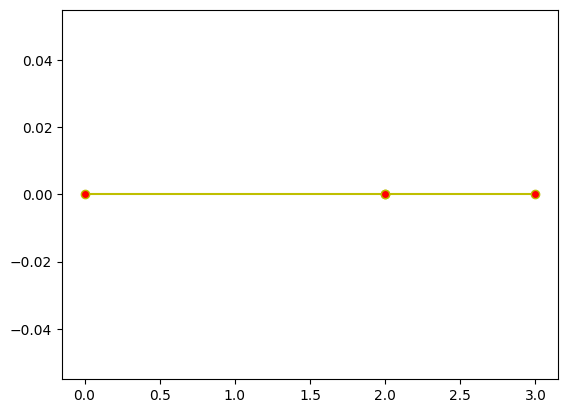

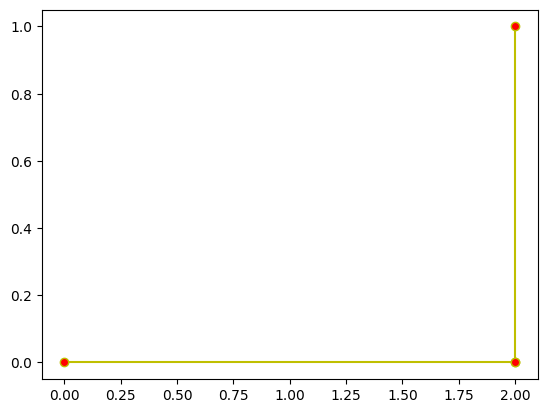

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# vinkler er vinklene som robotarmen er innstilt med
# lengder er lengdene på robotarmene
# funksjonen returnerer en liste som inneholder endepunktene til hver robotarm. Det siste endepunktet er effektoren
def fremoverKinematikk(vinkler, lengder):
    punkter = np.zeros((len(vinkler) + 1, 2))
    vinkelSum = 0
    punkter[0,0] = 0.0
    punkter[0,1] = 0.0
    for i in range(len(vinkler)):
        vinkelSum += vinkler[i]
        punkter[i+1,0] = punkter[i,0] + lengder[i] * np.cos(vinkelSum)
        punkter[i+1,1] = punkter[i,1] + lengder[i] * np.sin(vinkelSum)
    return punkter

def tegnRobot(vinkler, lengder):
    if len(vinkler) != len(lengder):
        print("Du bruker ikke runForwardKI riktig")
    punkter = fremoverKinematikk(vinkler, lengder)
    koblinger = np.array([[i, i+1] for i in range(len(vinkler))])
    x = punkter[:,0].flatten()
    y = punkter[:,1].flatten()
    plt.plot(x[koblinger.T], y[koblinger.T], linestyle='-', color='y',
            markerfacecolor='red', marker='o') 
    plt.show()

lengder = np.array([2.0, 1.0])   # lengden på armene
vinkler = np.array([0.0, 0.0])   # vinkler mellom armene (vinkel med x-akse for arm 0)
    
tegnRobot(vinkler, lengder)

lengder = np.array([2.0, 1.0])   
vinkler = np.array([0.0, np.pi/2.0])

tegnRobot(vinkler, lengder)


## Oppgave 4

Kopier koden over og endre slik at den tegner en robotarm med tre armer. 

Alle delene av robotarmen skal ha lengde 1 og del en av armen skal være horisontal, del to av armen skal stå vertikalt oppover, og del tre av armen skal være horisontal og peke framover igjen. Illustrasjonen skal se ut som en trapp oppover til høyre.  (Husk at numpy leser vinkler i radianer, np.pi vil gi en god approksimasjon til pi.)

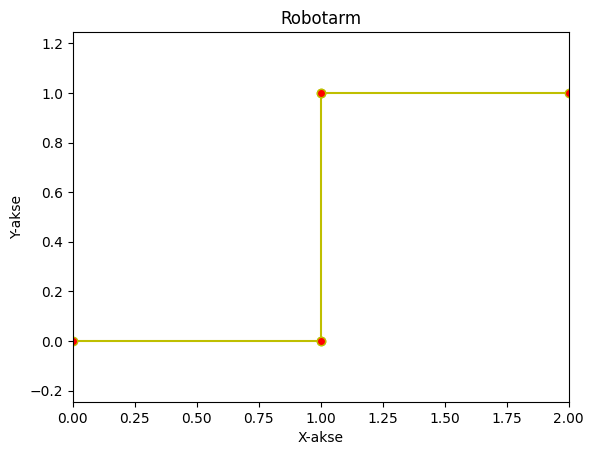

In [131]:
#
# Svaret på oppgaven skal legges inn her
#
import numpy as np
import matplotlib.pyplot as plt

# vinkler er vinklene som robotarmen er innstilt med
# lengder er lengdene på robotarmene
# funksjonen returnerer en liste som inneholder endepunktene til hver robotarm. Det siste endepunktet er effektoren
def fremoverKinematikk(vinkler, lengder):
    punkter = np.zeros((len(vinkler) + 1, 2))
    vinkelSum = 0
    punkter[0,0] = 0.0
    punkter[0,1] = 0.0
    for i in range(len(vinkler)):
        vinkelSum += vinkler[i]
        punkter[i+1,0] = punkter[i,0] + lengder[i] * np.cos(vinkelSum)
        punkter[i+1,1] = punkter[i,1] + lengder[i] * np.sin(vinkelSum)
    return punkter

def tegnRobot(vinkler, lengder):
    if len(vinkler) != len(lengder):
        print("Du bruker ikke runForwardKI riktig")
    punkter = fremoverKinematikk(vinkler, lengder)
    koblinger = np.array([[i, i+1] for i in range(len(vinkler))])
    x = punkter[:,0].flatten()
    y = punkter[:,1].flatten()
    plt.plot(x[koblinger.T], y[koblinger.T], linestyle='-', color='y',
            markerfacecolor='red', marker='o') 
    plt.axis('equal')  # Sett aksene til å ha samme skala
    plt.xlim(np.min(x), np.max(x))  # Juster x-grensen for bedre visning
    plt.ylim(np.min(y), np.max(y))  # Juster y-grensen for bedre visning
    plt.title("Robotarm")
    plt.xlabel("X-akse")
    plt.ylabel("Y-akse")
    plt.show()

lengder = np.array([1.0, 1.0, 1.0])   
vinkler = np.array([0.0, np.pi/2.0, -(np.pi/2.0)])

tegnRobot(vinkler, lengder)

# Del 4 Kinematikk bakover

Denne gangen skal vi bruke det vi lærte tidligere og få programmet til å justere vinklene slik effektoren havner i et bestemt punkt, kun ved å endre vinkelen til armene. Dette er et mye vanskeligere problem.



## Oppgave 5

I dette eksempelet så har vi samme robotarmen med lengder $2$, $1$ og $1.5$. Vi vil finne ut av hvilke vinkler vi må bruke for at enden på armen skal havne i punktet (1.5,2.5). 

Dette kan vi gjøre med gradient descent ved å lage en funksjon som tar vinkelene og lengdene til robotarmen som input og som gir kvadratet av avstanden mellom posisjonen på effektoren og målet (1.5,2.5) som output. 

Når algoritmen starter så skal roboten ligge langs positiv $x$-akse.

Toleransen skal være 0.001. Juster steglengde og max antall steg slik at du finner en så god løsning som mulig. Skriv ut steglengde og antall steg algoritmen bruker. Max antall steg skal ikke være over 50000. 

Lag et program som tegner robotarmen før beregningen starter og den beste løsningen du fant.


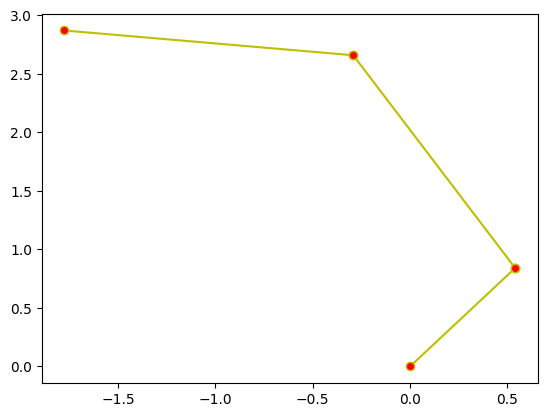

Algoritmen avsluttet etter 1 steg
Med vinklene vinkler =  [1. 1. 1.]  så har effektoren avstand  1.0 til målet 


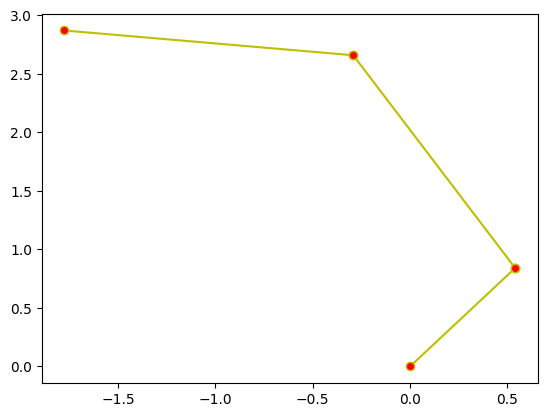

In [132]:

import numpy as np
import matplotlib.pyplot as plt

abs = np.linalg.norm

def fremoverKinematikk(vinkler, lengder):
    punkter = np.zeros((len(vinkler) + 1, 2))
    vinkelSum = 0
    punkter[0,0] = 0.0
    punkter[0,1] = 0.0
    for i in range(len(vinkler)):
        vinkelSum = vinkelSum + vinkler[i]
        punkter[i+1,0] = punkter[i,0] + lengder[i] * np.cos(vinkelSum)
        punkter[i+1,1] = punkter[i,1] + lengder[i] * np.sin(vinkelSum)
    return punkter

def tegnRobot(vinkler, lengder):
    if len(vinkler) != len(lengder):
        print("Du bruker ikke tegnRobot riktig")
    punkter = fremoverKinematikk(vinkler, lengder)
    koblinger = np.array([[i, i+1] for i in range(len(vinkler))])
    x = punkter[:,0].flatten()
    y = punkter[:,1].flatten()
    plt.plot(x[koblinger.T], y[koblinger.T], linestyle='-', color='y',
            markerfacecolor='red', marker='o') 
    plt.show()
    
    
# *************************************************
# Dette må dere implementere
#


# Funksjonen regner ut kvadratet av avstanden fra effektoren (med vinkler p) og målet vi ønsker å nå
def f(p):
    return 1.0  # Fjern denne linjen før dere starter
# 
#
# ***************************************************
    
def diff(f, p, i, delta):
    q1 = np.copy(p) 
    q1[i] -= delta
    q2 = np.copy(p) 
    q2[i] += delta
    return (f(q2) - f(q1))  / (2*delta)

def gradient(f, p, delta):
    grad = [diff(f,p,i,delta) for i in range(len(p))]
    return np.array(grad)    
    
    
# **************************************************
# Dere må gjøre noen fornuftige valg for tallene her
#
delta = 1.0    
toleranse = 10.0
stegLengde = 0.1            
lengder = [1.0, 2.0, 1.5]
p = np.array([1.0,1.0,1.0])
maxAntallSteg = 1000
#
#
# ***************************************************

# Vi tegner robotarmen før algoritmen starter
vinkler = p
tegnRobot(vinkler, lengder)


feil = gradient(f, p, delta)
antallSteg = 1

while abs(feil) > toleranse and maxAntallSteg > antallSteg:
    nyGradient = gradient(f,p,delta)
    p = p - stegLengde * nyGradient
    feil = nyGradient
    antallSteg = antallSteg + 1
    
if maxAntallSteg <= antallSteg:
    print("Algoritmen avsluttet da den brukte for lang tid")
else:
    print("Algoritmen avsluttet etter", antallSteg, "steg")

print("Med vinklene vinkler = ",p, " så har effektoren avstand ", np.sqrt(f(p)), "til målet ")

# Vi tegner etter at algoritmen blir kjørt
vinkler = p
tegnRobot(vinkler, lengder)



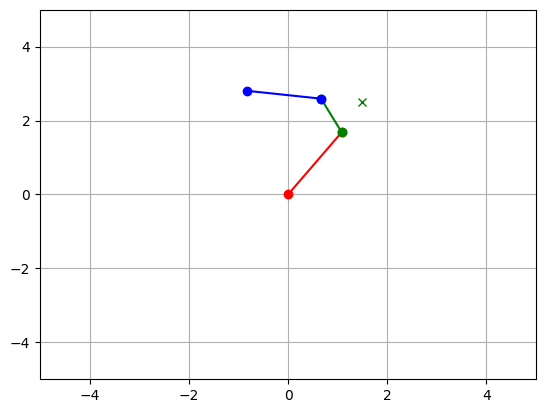

Algoritmen avsluttet etter 9242 steg
Med vinklene vinkler =  [ 0.63979905 -0.38274445  2.10807672]  så har effektoren avstand  0.001580215664130534 til målet 


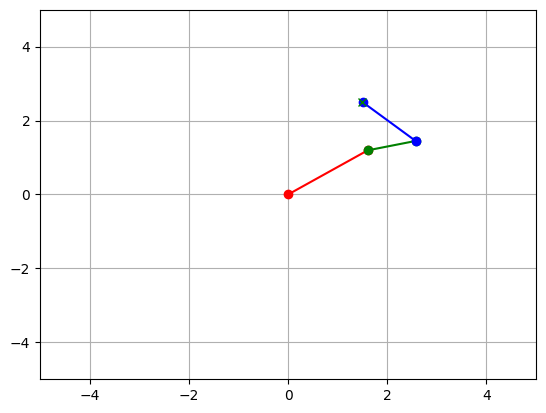

In [136]:
#
# Svaret på oppgaven skal legges inn her
#

import numpy as np
import matplotlib.pyplot as plt

abs = np.linalg.norm

def fremoverKinematikk(vinkler, lengder):
    punkter = np.zeros((len(vinkler) + 1, 2))
    vinkelSum = 0
    punkter[0,0] = 0.0
    punkter[0,1] = 0.0
    for i in range(len(vinkler)):
        vinkelSum = vinkelSum + vinkler[i]
        punkter[i+1,0] = punkter[i,0] + lengder[i] * np.cos(vinkelSum)
        punkter[i+1,1] = punkter[i,1] + lengder[i] * np.sin(vinkelSum)
    return punkter

def tegnRobot(vinkler, lengder):
    if len(vinkler) != len(lengder):
        print("Du bruker ikke tegnRobot riktig")
    punkter = fremoverKinematikk(vinkler, lengder)
    koblinger = np.array([[i, i+1] for i in range(len(vinkler))])

    farger = ['r', 'g', 'b']
    for i, farge in enumerate(farger):
        x = punkter[koblinger[i], 0]
        y = punkter[koblinger[i], 1]
        plt.plot(x, y, linestyle='-', color=farge,
                 markerfacecolor=farger[i % len(farger)], marker='o')

    plt.plot(endepunkt[0], endepunkt[1], marker='x', color='g')
    plt.grid(True)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()
    
    


def f(p):
    vinkler = p
    punkter = fremoverKinematikk(vinkler, lengder)
    effektor = punkter[-1]
    return abs(effektor - endepunkt)**2

def diff(f, p, i, delta):
    q1 = np.copy(p) 
    q1[i] -= delta
    q2 = np.copy(p) 
    q2[i] += delta
    return (f(q2) - f(q1))  / (2*delta)

def gradient(f, p, delta):
    grad = [diff(f,p,i,delta) for i in range(len(p))]
    return np.array(grad)    
    
    
lengder = [2.0, 1.0, 1.5]
p = np.array([1.0,1.0,1.0])
endepunkt = np.array([1.5, 2.5])

delta = 0.00001    
toleranse = 0.01
stegLengde = 0.1            
maxAntallSteg = 10000

vinkler = p
tegnRobot(vinkler, lengder)


feil = gradient(f, p, delta)
antallSteg = 1

while abs(feil) > toleranse and maxAntallSteg > antallSteg:
    nyGradient = gradient(f,p,delta)
    p = p - stegLengde * nyGradient
    feil = nyGradient
    antallSteg = antallSteg + 1
    
if maxAntallSteg <= antallSteg:
    print("Algoritmen avsluttet da den brukte for lang tid")
else:
    print("Algoritmen avsluttet etter", antallSteg, "steg")

print("Med vinklene vinkler = ",p, " så har effektoren avstand ", np.sqrt(f(p)), "til målet ")


vinkler = p
tegnRobot(vinkler, lengder)



## Oppgave 6

Vi er gitt en robotarm i xy-planet som i eksempelet over med tre deler. Del en av armen har lengde 1, del to av armen har lengde 2 og del tre av armen har lengde 3.

Bruk gradient descent til å finne en liste over vinkler slik at effektoren havner i punktet (3.5,1.0).

Kopier og endre på svaret ditt fra Oppgave 6. Toleransen skal være 0.001. Juster steglengde og max antall steg for å finne en god løsning. Max antall steg skal være mindre enn 50000.

Skriv ut steglengde, antall steg som ble brukt, og avstanden fra effektoren til målet (3.5, 1.0).

Når du starter så skal robotarmen ligge langs positiv $y$-akse.

Lag et program som tegner roboten før beregningen starter og den beste løsningen du fant.


Init position nr  1


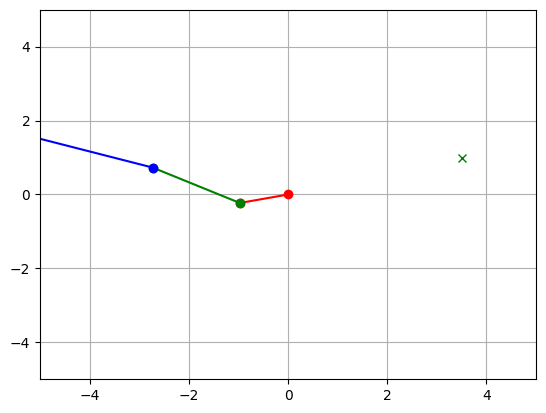

Losning


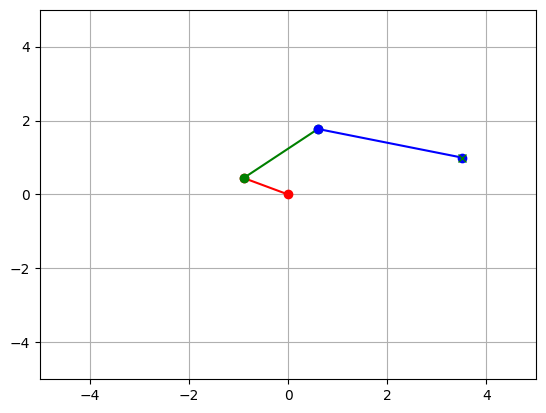

Algoritmen avsluttet etter 256 steg, med steplengde:  0.01
Med vinklene vinkler =  [-3.6035242  -1.95441943 -0.98559781]  så har effektoren avstand  0.00038179257683844425 til målet 


Init position nr  2


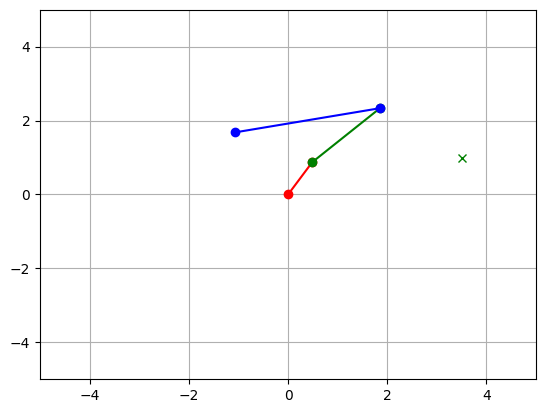

Losning


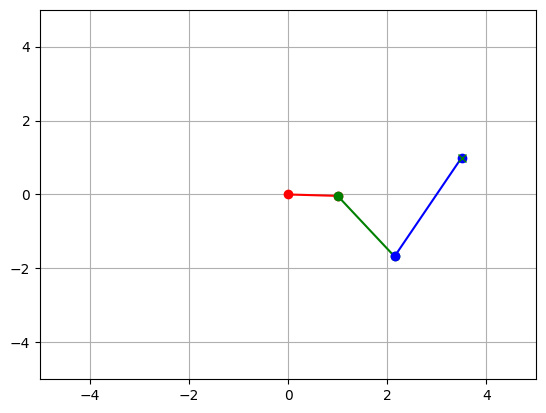

Algoritmen avsluttet etter 111 steg, med steplengde:  0.01
Med vinklene vinkler =  [-0.03819342 -0.9222493   2.06290025]  så har effektoren avstand  0.00023244312514098813 til målet 


Init position nr  3


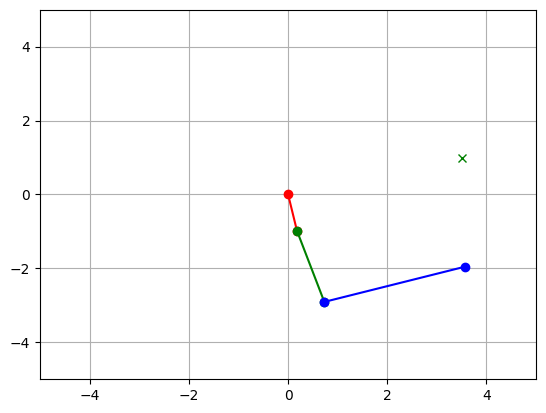

Losning


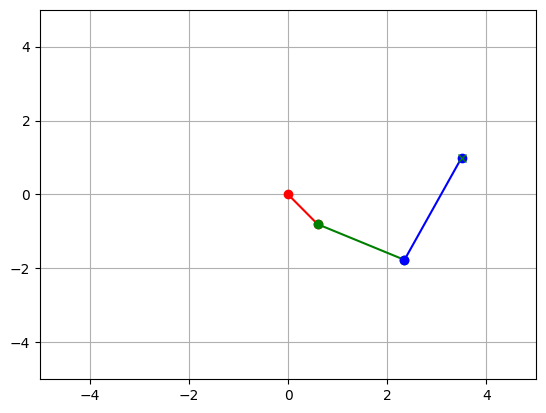

Algoritmen avsluttet etter 93 steg, med steplengde:  0.01
Med vinklene vinkler =  [-0.93397827  0.43021375  1.67984744]  så har effektoren avstand  0.00022286406731214596 til målet 


Init position nr  4


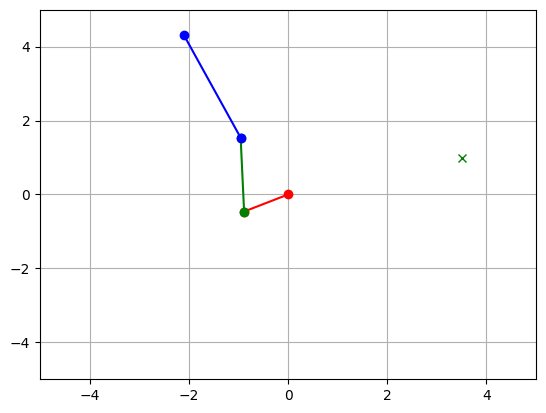

Losning


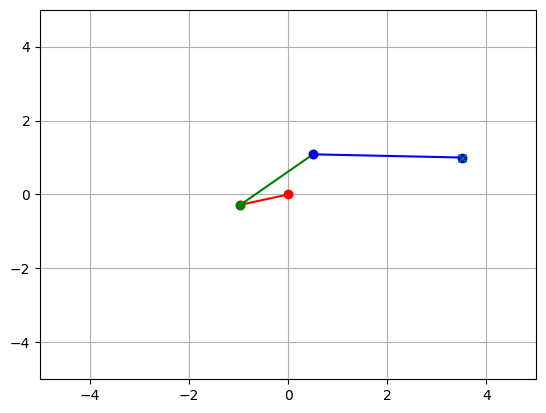

Algoritmen avsluttet etter 734 steg, med steplengde:  0.01
Med vinklene vinkler =  [-2.85962525 -2.67279466 -0.77944293]  så har effektoren avstand  0.0006047159838247626 til målet 


Init position nr  5


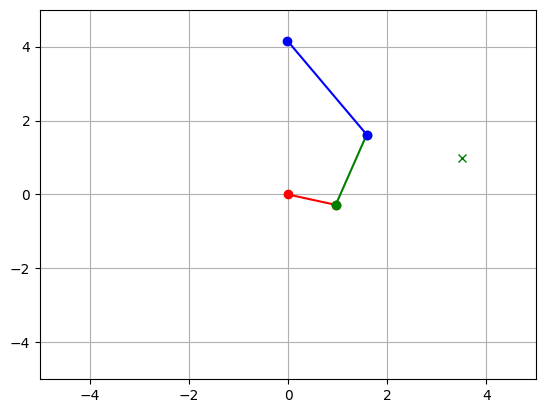

Losning


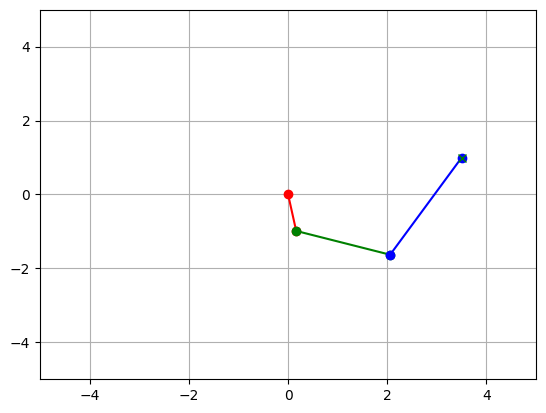

Algoritmen avsluttet etter 145 steg, med steplengde:  0.01
Med vinklene vinkler =  [-1.40693377  1.07949499  1.39631004]  så har effektoren avstand  0.0002484759372983981 til målet 


Init position nr  6


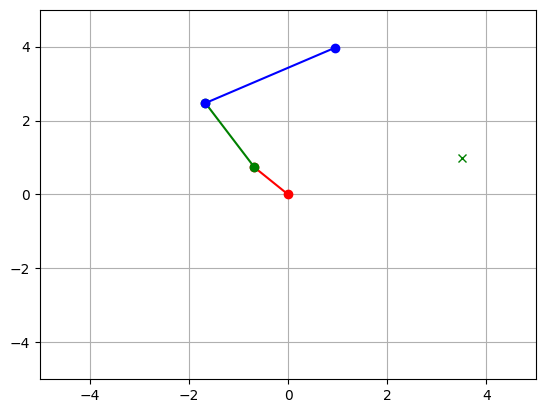

Losning


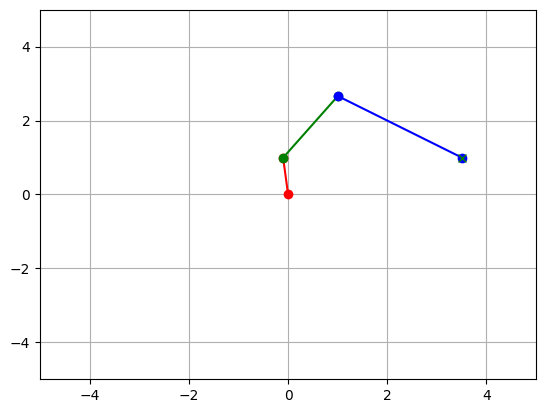

Algoritmen avsluttet etter 106 steg, med steplengde:  0.01
Med vinklene vinkler =  [ 1.67129901 -0.68484131 -1.5740607 ]  så har effektoren avstand  0.0002222335487415824 til målet 


Init position nr  7


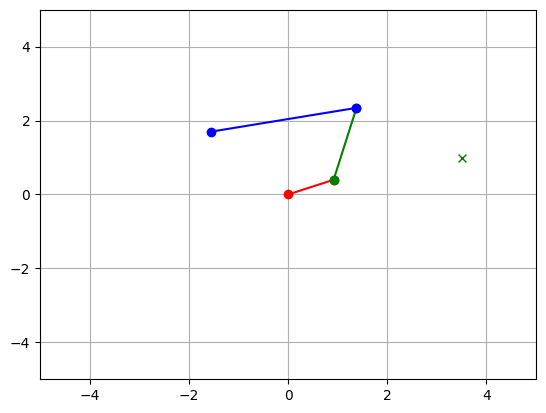

Losning


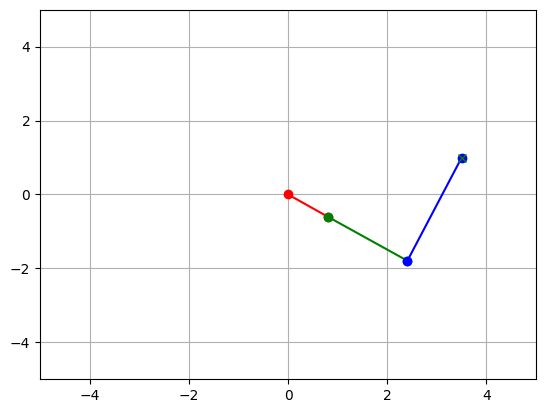

Algoritmen avsluttet etter 85 steg, med steplengde:  0.01
Med vinklene vinkler =  [-0.64490551  0.00632696  1.83582352]  så har effektoren avstand  0.00021936741828422162 til målet 


Init position nr  8


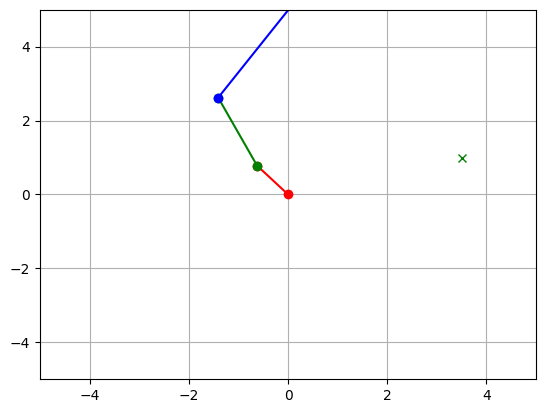

Losning


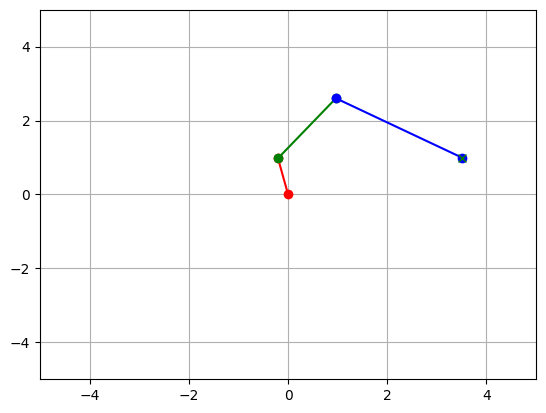

Algoritmen avsluttet etter 99 steg, med steplengde:  0.01
Med vinklene vinkler =  [ 1.77601826 -0.82882767 -1.51074225]  så har effektoren avstand  0.0002371434125809471 til målet 


Init position nr  9


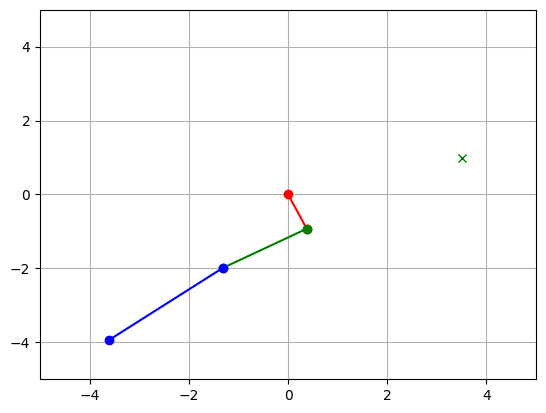

Losning


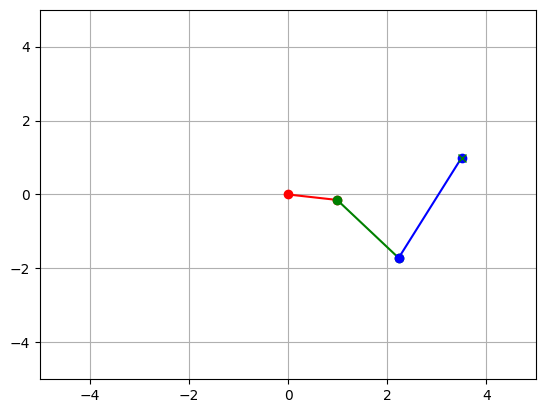

Algoritmen avsluttet etter 136 steg, med steplengde:  0.01
Med vinklene vinkler =  [-0.14833733 -0.75384941  2.03535365]  så har effektoren avstand  0.00022131291454900192 til målet 


Init position nr  10


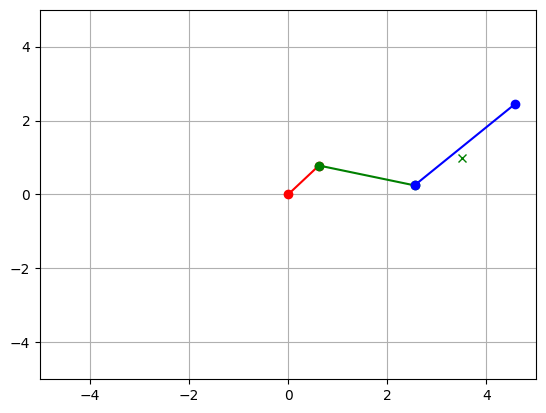

Losning


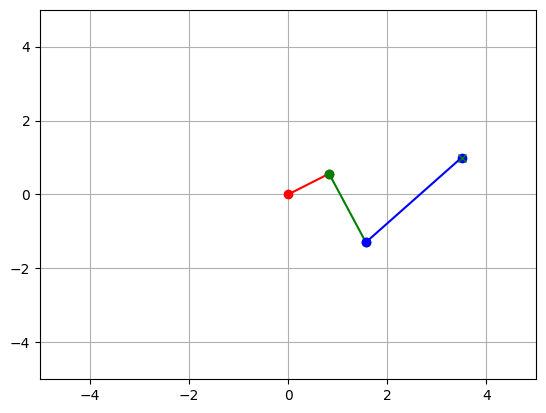

Algoritmen avsluttet etter 184 steg, med steplengde:  0.01
Med vinklene vinkler =  [ 0.59811362 -1.78921119  2.06192393]  så har effektoren avstand  0.00028932019381543915 til målet 



Vinkler:  [-3.6  -1.95 -0.99]  ->  0.00038179  avstand   |  0.01  steglengde

Vinkler:  [-0.04 -0.92  2.06]  ->  0.00023244  avstand   |  0.01  steglengde

Vinkler:  [-0.93  0.43  1.68]  ->  0.00022286  avstand   |  0.01  steglengde

Vinkler:  [-2.86 -2.67 -0.78]  ->  0.00060472  avstand   |  0.01  steglengde

Vinkler:  [-1.41  1.08  1.4 ]  ->  0.00024848  avstand   |  0.01  steglengde

Vinkler:  [ 1.67 -0.68 -1.57]  ->  0.00022223  avstand   |  0.01  steglengde

Vinkler:  [-0.64  0.01  1.84]  ->  0.00021937  avstand   |  0.01  steglengde

Vinkler:  [ 1.78 -0.83 -1.51]  ->  0.00023714  avstand   |  0.01  steglengde

Vinkler:  [-0.15 -0.75  2.04]  ->  0.00022131  avstand   |  0.01  steglengde

Vinkler:  [ 0.6  -1.79  2.06]  ->  0.00028932  avstand   |  0.01  steglengde


In [137]:
import numpy as np
import matplotlib.pyplot as plt

abs = np.linalg.norm

def fremoverKinematikk(vinkler, lengder):
    punkter = np.zeros((len(vinkler) + 1, 2))
    vinkelSum = 0
    punkter[0,0] = 0.0         
    punkter[0,1] = 0.0
    for i in range(len(vinkler)):
        vinkelSum = vinkelSum + vinkler[i]
        punkter[i+1,0] = punkter[i,0] + lengder[i] * np.cos(vinkelSum)
        punkter[i+1,1] = punkter[i,1] + lengder[i] * np.sin(vinkelSum)
    return punkter

def tegnRobot(vinkler, lengder):
    if len(vinkler) != len(lengder):
        print("Du bruker ikke tegnRobot riktig")
    punkter = fremoverKinematikk(vinkler, lengder)
    koblinger = np.array([[i, i+1] for i in range(len(vinkler))])

    farger = ['r', 'g', 'b']
    for i, farge in enumerate(farger):
        x = punkter[koblinger[i], 0]
        y = punkter[koblinger[i], 1]
        plt.plot(x, y, linestyle='-', color=farge,
                 markerfacecolor=farger[i % len(farger)], marker='o')

    plt.plot(endepunkt[0], endepunkt[1], marker='x', color='g')
    plt.grid(True)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()
    
    


def f(p):
    vinkler = p
    punkter = fremoverKinematikk(vinkler, lengder)
    effektor = punkter[-1]
    return abs(effektor - endepunkt)**2

def diff(f, p, i, delta):
    q1 = np.copy(p) 
    q1[i] -= delta
    q2 = np.copy(p) 
    q2[i] += delta
    return (f(q2) - f(q1))  / (2*delta)

def gradient(f, p, delta):
    grad = [diff(f,p,i,delta) for i in range(len(p))]
    return np.array(grad)    
    
    
lengder = [1.0, 2.0, 3.0]
p = np.array([np.pi/2.0, 0.0, 0.0])
endepunkt = np.array([3.5, 1.0])

delta = 0.00001    
toleranse = 0.001
stegLengde = 0.01            
maxAntallSteg = 40000


resultat_vinkler = []
avstander = []
antall_forsok = 10

for i in range(antall_forsok):
    p = np.random.uniform(-np.pi, np.pi, size=len(lengder)) # tilfeldige vinkler mellom -pi og pi

    vinkler = p
    print("Init position nr ", i+1)
    tegnRobot(vinkler, lengder)

    feil = gradient(f, p, delta)
    antallSteg = 1

    while abs(feil) > toleranse and maxAntallSteg > antallSteg:
        nyGradient = gradient(f,p,delta)
        p = p - stegLengde * nyGradient
        feil = nyGradient
        antallSteg = antallSteg + 1
        
    print("Losning")
    vinkler = p
    avstander.append(np.sqrt(f(p)))
    resultat_vinkler.append(vinkler)
    tegnRobot(vinkler, lengder)
    
    if maxAntallSteg <= antallSteg:
        print("Algoritmen avsluttet da den brukte for lang tid")
    else:
        print("Algoritmen avsluttet etter", antallSteg, "steg, med steplengde: ", stegLengde)

    print("Med vinklene vinkler = ",p, " så har effektoren avstand ", np.sqrt(f(p)), "til målet ")
    print("")
    print("")


for i, r in enumerate(resultat_vinkler):
    print("")
    print("Vinkler: ", np.round(r, 2), " -> ", np.round(avstander[i], 8), " avstand ", " | ", stegLengde, " steglengde")




## Oppgave 7

Vi er gitt en robotarm i xy-planet som i de tidligere oppgavene med tre deler. Men, leddet mellom del 2 og del 3 er låst i 30 grader. Del en av armen har lengde 3, del to av armen har lengde 1 og del tre av armen har lengde 2.

Kopier og endre på koden fra oppgave 5/6. Toleransen skal være 0.001. Juster steglengde og max antall steg for å finne en god løsning. Max antall steg skal være mindre enn 100000. Bruk samme mål for effektoren som i oppgave 6, dvs. (1.5,2.5).

Skriv ut steglengde, antall steg som ble brukt, og avstanden fra effektoren til målet i løsningen.

Når du starter så skal del 1 og del 2 av robotarmen ligge i første kvadrant langs linjen $y=x$.

Lag et program som tegner roboten før beregningen starter og den beste løsningen du fant.


Init. Steglendge:  0.1


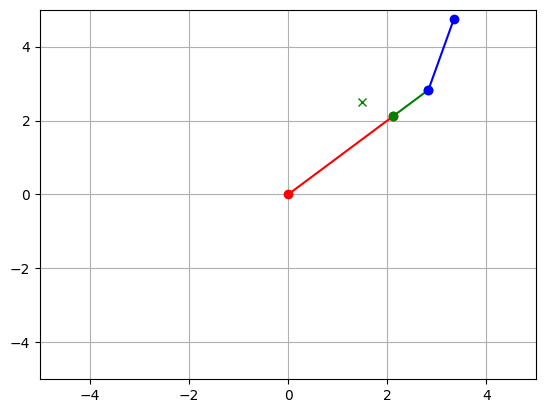

Losning


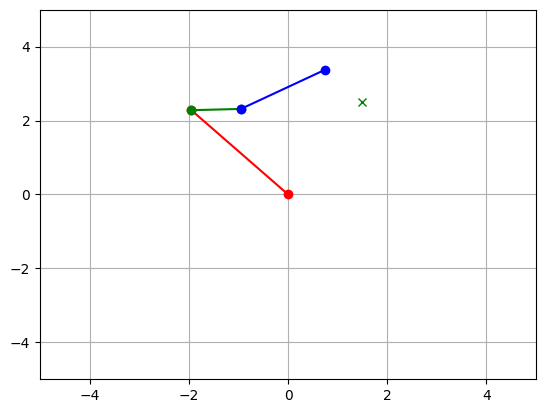

Algoritmen avsluttet da den brukte for lang tid
Med vinklene vinkler =  [2.27829338 4.03989078]  så har effektoren avstand  1.1552929301650596 til målet 


Init. Steglendge:  0.01


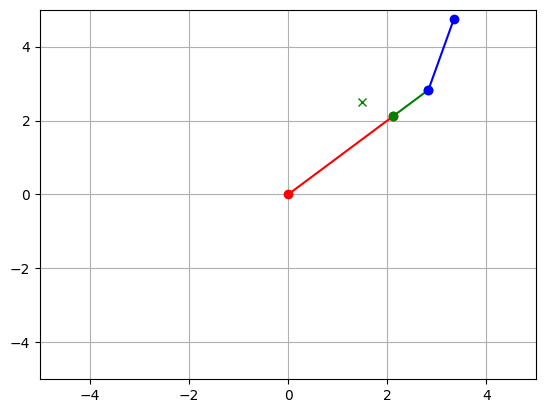

Losning


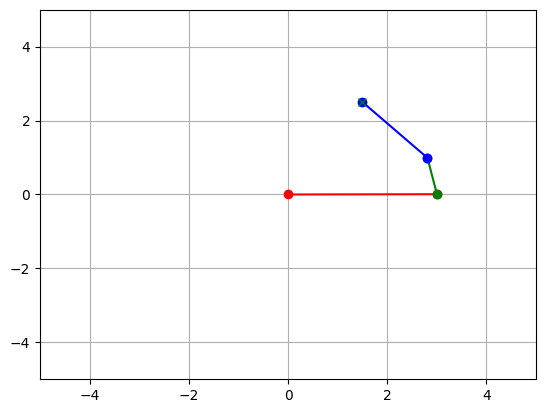

Algoritmen avsluttet etter 122 steg, med steplengde:  0.01
Med vinklene vinkler =  [0.00246279 1.75914064]  så har effektoren avstand  0.0002034915904915056 til målet 


Init. Steglendge:  0.001


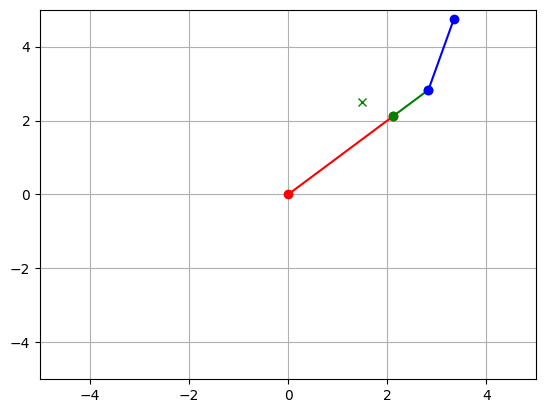

Losning


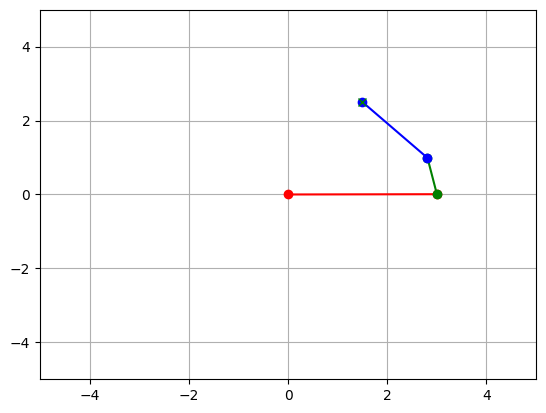

Algoritmen avsluttet etter 1233 steg, med steplengde:  0.001
Med vinklene vinkler =  [0.00247264 1.75913074]  så har effektoren avstand  0.00023311677675982663 til målet 


Init. Steglendge:  0.0001


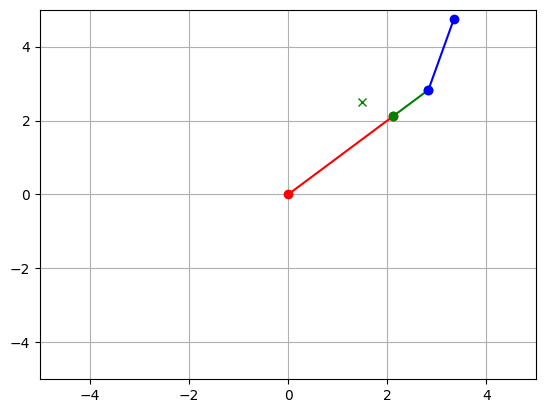

Losning


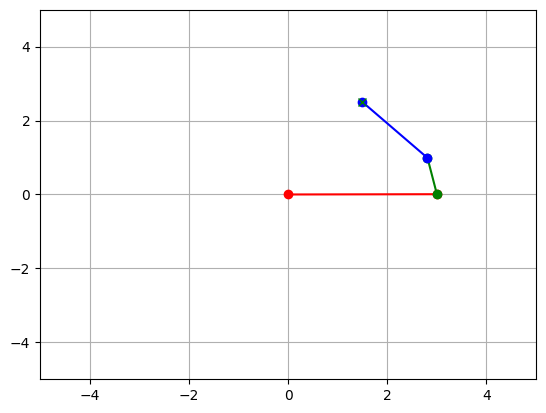

Algoritmen avsluttet etter 12346 steg, med steplengde:  0.0001
Med vinklene vinkler =  [0.0024734  1.75912997]  så har effektoren avstand  0.0002354181231555809 til målet 



Vinkler:  [2.28 4.04 0.52]  ->  1.15529293  avstand   |  0.0001  steglengde

Vinkler:  [0.   1.76 0.52]  ->  0.00020349  avstand   |  0.0001  steglengde

Vinkler:  [0.   1.76 0.52]  ->  0.00023312  avstand   |  0.0001  steglengde

Vinkler:  [0.   1.76 0.52]  ->  0.00023542  avstand   |  0.0001  steglengde


In [138]:
#
# Svaret på oppgaven skal legges inn her
#
import numpy as np
import matplotlib.pyplot as plt

abs = np.linalg.norm

def fremoverKinematikk(vinkler, lengder):
    punkter = np.zeros((len(vinkler) + 1, 2))
    vinkelSum = 0
    punkter[0,0] = 0.0         
    punkter[0,1] = 0.0
    for i in range(len(vinkler)):
        vinkelSum = vinkelSum + vinkler[i]
        punkter[i+1,0] = punkter[i,0] + lengder[i] * np.cos(vinkelSum)
        punkter[i+1,1] = punkter[i,1] + lengder[i] * np.sin(vinkelSum)
    return punkter

def tegnRobot(vinkler, lengder):
    if len(vinkler) != len(lengder):
        print("Du bruker ikke tegnRobot riktig")
    punkter = fremoverKinematikk(vinkler, lengder)
    koblinger = np.array([[i, i+1] for i in range(len(vinkler))])

    farger = ['r', 'g', 'b']
    for i, farge in enumerate(farger):
        x = punkter[koblinger[i], 0]
        y = punkter[koblinger[i], 1]
        plt.plot(x, y, linestyle='-', color=farge,
                 markerfacecolor=farger[i % len(farger)], marker='o')

    plt.plot(endepunkt[0], endepunkt[1], marker='x', color='g')
    plt.grid(True)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()
    
    


def f(p):
    vinkler = p
    punkter = fremoverKinematikk(vinkler, lengder)
    effektor = punkter[-1]
    return abs(effektor - endepunkt)**2

def diff(f, p, i, delta):
    q1 = np.copy(p) 
    q1[i] -= delta
    q2 = np.copy(p) 
    q2[i] += delta
    return (f(q2) - f(q1))  / (2*delta)

def gradient(f, p, delta):
    grad = [diff(f,p,i,delta) for i in range(len(p))]
    return np.array(grad)    

def beregn_avstand(vinkler):
    punkter = fremoverKinematikk(vinkler, lengder)
    effektor = punkter[-1]
    return abs(effektor - endepunkt)

lengder = [3.0, 1.0, 2.0]
fast_vinkel = 0.5236 #radianer = 30 grader
endepunkt = np.array([1.5, 2.5])


delta = 0.00001    
toleranse = 0.001
stegLengder = [0.1, 0.01, 0.001, 0.0001]            
maxAntallSteg = 40000



resultat_vinkler = []
avstander = []
antall_forsok = 5


for i, stegLengde in enumerate(stegLengder):
    p = np.array([np.pi/4, 0]) # ledd 1 og 2 langs y=x linjen

    vinkler = np.append(p, fast_vinkel)
    print("Init. Steglendge: ", stegLengde)
    tegnRobot(vinkler, lengder)

    feil = gradient(lambda x: f(np.append(x, fast_vinkel)), p, delta)
    antallSteg = 1

    while abs(feil) > toleranse and maxAntallSteg > antallSteg:
        nyGradient = gradient(lambda x: f(np.append(x, fast_vinkel)), p, delta)
        p = p - stegLengde * nyGradient
        feil = nyGradient
        antallSteg = antallSteg + 1

    print("Losning")
    vinkler = np.append(p, fast_vinkel)
    avstander.append(beregn_avstand(vinkler))

    resultat_vinkler.append(vinkler)
    tegnRobot(vinkler, lengder)

    if maxAntallSteg <= antallSteg:
        print("Algoritmen avsluttet da den brukte for lang tid")
    else:
        print("Algoritmen avsluttet etter", antallSteg, "steg, med steplengde: ", stegLengde)

    print("Med vinklene vinkler = ",p, " så har effektoren avstand ", beregn_avstand(vinkler), "til målet ")
    print("")
    print("")


    

for i, r in enumerate(resultat_vinkler):
    print("")
    print("Vinkler: ", np.round(r, 2), " -> ", np.round(avstander[i], 8), " avstand ", " | ", stegLengde, " steglengde")




# En kommentar helt til slutt

Å styre en robot er komplisert, og vi har gitt en veldig enkel fremgangsmåte her, som nok er litt for enkel for praktisk bruk. For det første så lever roboter stort sett i en 3 dimensjonal verden. Dette gjør matematikken litt mer komplisert. De har gjerne ikke full frihet i bevegelsene, slik at definisjonsområdet til problemet blir svært viktig. Det er mange andre ting som oppstår som vi ikke har diskutert.

Men uansett, mer robuste algoritmer for styring av roboter bruker ting som gradienter, Hessematriser, Jacobimatriser, kulekoordinater og andre ting fra dette kurset.
